## Kinect vs. Vicon


**Vicon & Kinect data obtained by post stroke volunteer while playing a Serius Game.**

---
*By KOBYLARZ, J in partnership with PUCPR*

#Kinect

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data from computer using colab functions.

#from google.colab import files
#uploaded = files.upload()

df = pd.read_csv("AVC2_cabeceio01_08_11_Kinect.csv")
df.head()

,Angulacao_de_tronco,Bola_foi_lancada,Bola_pega
0,0.00,0,0
1,-17.57,0,0
2,-17.57,0,0
3,-7.79,0,0
4,-7.79,0,0


In [3]:
#Shape of my df
df.shape

(1881, 3)

In [4]:
df.keys()

Index(['Angulacao_de_tronco', ' Bola_foi_lancada', ' Bola_pega'], dtype='object')

In [0]:
df.columns = ['angulo','lancamento','catch']

In [6]:
df.keys()

Index(['angulo', 'lancamento', 'catch'], dtype='object')

In [7]:
print(df['angulo'].head(10))

0     0.00
1   -17.57
2   -17.57
3    -7.79
4    -7.79
5    -5.29
6    -5.29
7    -4.43
8    -4.43
9    -4.10
Name: angulo, dtype: float64


In [0]:
print(df['lancamento'].head(10))

In [0]:
print(df['catch'].head(10))

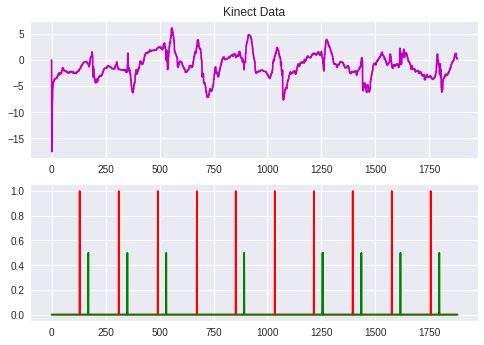

In [8]:
#Graph

angulo = df['angulo']
lancamento = df['lancamento']
pega_bola = df['catch'] * 0.5

plt.subplot(2,1,1)
plt.plot(angulo, c = 'm')
plt.title('Kinect Data')
plt.show

plt.subplot(2, 1, 2)
plt.plot(lancamento, c ='r')
plt.plot(pega_bola, c = 'g') 
plt.show()


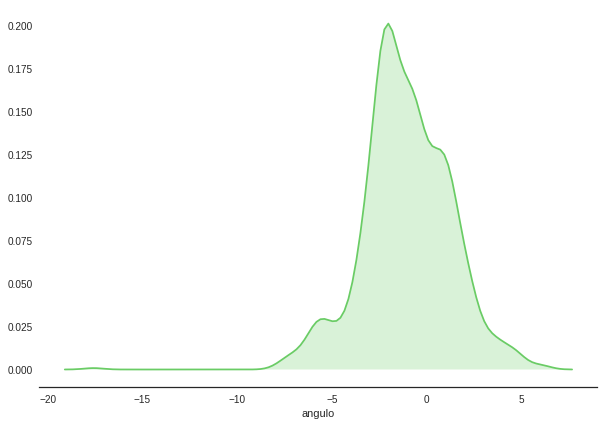

In [9]:
#Different visualization

sns.set(style="white", palette="muted", color_codes=True)

f, axes= plt.subplots(figsize=(10, 7), sharex=True)
sns.despine(left=True)

angulo = df['angulo']

sns.distplot(angulo, hist=False, color="g", kde_kws={"shade": True})

#Vicon

In [11]:
#Import and showing head of Kinect data
##from google.colab import files
##uploaded = files.upload()

Saving AVC2_cabeceio01_08_11_Vicon.csv to AVC2_cabeceio01_08_11_Vicon.csv


In [0]:
#Import Vicon data
vicon_df = pd.read_csv("AVC2_cabeceio01_08_11_Vicon.csv")

In [16]:
vicon_df.head()

,Frame,V_AVC_02:C7,V_AVC_02:T10,V_AVC_02:CLAV,V_AVC_02:STRN,V_AVC_02:RBAK
0,500,161.653,143.801,328.531,454.212,108.585
1,501,161.573,143.796,328.448,454.151,108.540
2,502,161.440,143.792,328.379,454.113,108.503
3,503,161.336,143.774,328.256,454.084,108.405
4,504,161.258,143.739,328.120,454.079,108.350


In [19]:
#Fist of all, lets rename our columns (Highlights)
vicon_df.columns

Index(['Frame', 'V_AVC_02:C7', 'V_AVC_02:T10', 'V_AVC_02:CLAV',
       'V_AVC_02:STRN', 'V_AVC_02:RBAK'],
      dtype='object')

In [0]:
new_index = ["Frame", "Highlighter1", "Highlighter2", "Highlighter3", "Highlighter4", "Highlighter5"]
vicon_df.columns = new_index

In [25]:
vicon_df.keys()

Index(['Frame', 'Highlighter1', 'Highlighter2', 'Highlighter3', 'Highlighter4',
       'Highlighter5'],
      dtype='object')

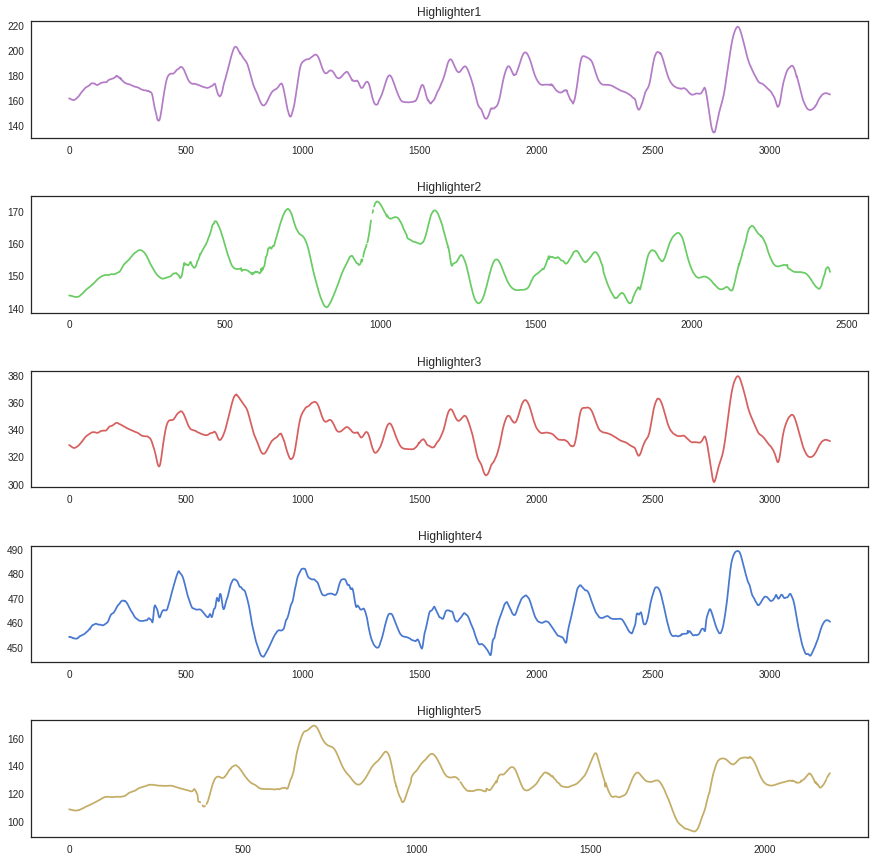

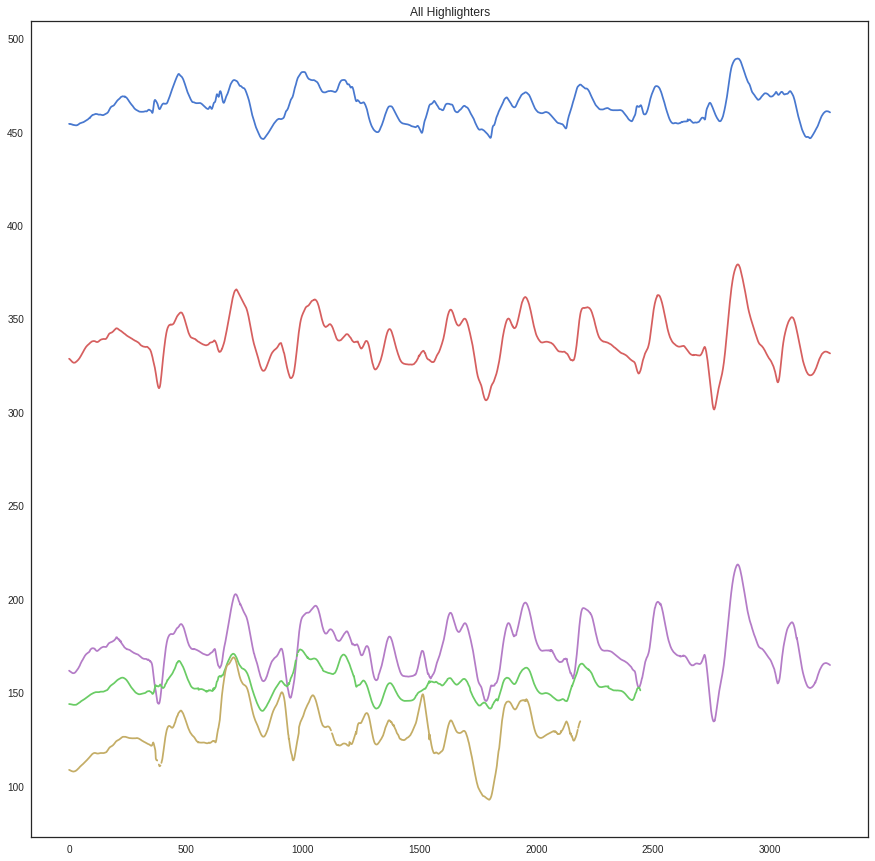

In [100]:
#Graph for the Vicon df

x = len(vicon_df['Highlighter1'])
f1 = vicon_df['Highlighter1']
f2 = vicon_df['Highlighter2']
f3 = vicon_df['Highlighter3']
f4 = vicon_df['Highlighter4']
f5 = vicon_df['Highlighter5']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

axes[0].plot(f1, c = 'm')
axes[0].set_title('Highlighter1')
axes[1].plot(f2, c = 'g')
axes[1].set_title('Highlighter2')
axes[2].plot(f3, c = 'r')
axes[2].set_title('Highlighter3')
axes[3].plot(f4, c = 'b')
axes[3].set_title('Highlighter4')
axes[4].plot(f5, c = 'y')
axes[4].set_title('Highlighter5')
fig.subplots_adjust(hspace=0.5)
plt.show()

plt.subplots(figsize=(15,15))
plt.plot(f1, c = 'm')
plt.plot(f2, c = 'g')
plt.plot(f3, c = 'r')
plt.plot(f4, c = 'b')
plt.plot(f5, c = 'y')
plt.title('All Highlighters')
plt.show()



#Math

Cross correlation test

In [0]:
# Cross-correlation (cc)
# angle is the Kinect angle and f1...fn are the angles of Vicon hightlighters  
cc_angle_f1 = np.correlate(angulo, f1)
cc_angle_f2 = np.correlate(angulo, f2)
cc_angle_f3 = np.correlate(angulo, f3)
cc_angle_f4 = np.correlate(angulo, f4)
cc_angle_f5 = np.correlate(angulo, f5)



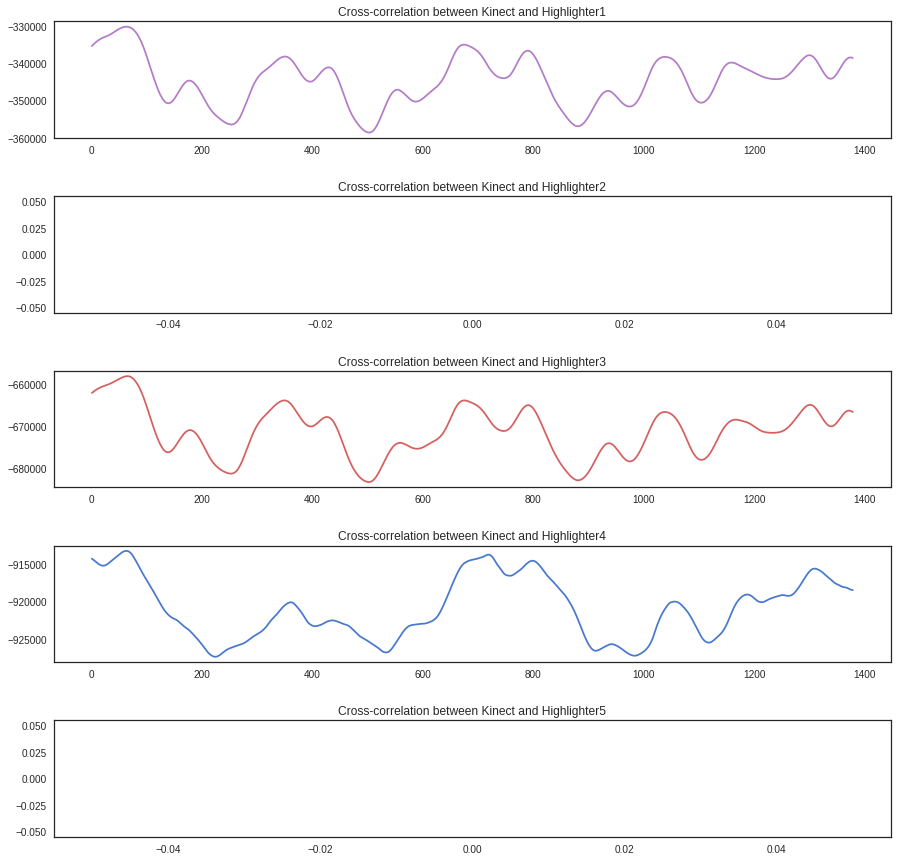

In [115]:
#Plot of Cross-correlation tests
fig1, axes1 = plt.subplots(nrows=5, ncols=1, figsize=(15, 15))

axes1[0].plot(cc_angle_f1, c = 'm')
axes1[0].set_title('Cross-correlation between Kinect and Highlighter1')
axes1[1].plot(cc_angle_f2, c = 'g')
axes1[1].set_title('Cross-correlation between Kinect and Highlighter2')
axes1[2].plot(cc_angle_f3, c = 'r')
axes1[2].set_title('Cross-correlation between Kinect and Highlighter3')
axes1[3].plot(cc_angle_f4, c = 'b')
axes1[3].set_title('Cross-correlation between Kinect and Highlighter4')
axes1[4].plot(cc_angle_f5, c = 'y')
axes1[4].set_title('Cross-correlation between Kinect and Highlighter5')
fig1.subplots_adjust(hspace=0.5)

plt.show()


Due to untreated NaN values, cross-correlation failed in samples 2 and 5


In [112]:
cc_angle_f2

array([nan, nan, nan, ..., nan, nan, nan])

In [113]:
cc_angle_f5

array([nan, nan, nan, ..., nan, nan, nan])